In [1]:
import numpy as np 
import pandas as pd

In [4]:
base_path = "../data_corr_0.5_negative_10000_no_gene_expr/"

In [5]:
nedbit_path = "df_nebit_dnam_features_aml_PNA.csv"
df_nebit_features = pd.read_csv(base_path + nedbit_path, sep=",")
df_nebit_features

,name,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,...,47,48,49,50,51,52,53,54,55,labels
0,cg01833436_SDCCAG8,485,1,0.460286,4.742593e+02,9.346998e-01,5.254281e-01,0.835195,0.872817,0.789144,...,0.485280,0.604581,0.664450,0.555493,0.618902,0.644076,0.501210,0.724217,0.662135,1
1,cg01833436_AKT3,485,1,0.460286,4.742593e+02,9.346998e-01,5.254281e-01,0.835195,0.872817,0.789144,...,0.485280,0.604581,0.664450,0.555493,0.618902,0.644076,0.501210,0.724217,0.662135,1
2,cg22032366_HMGN3,482,2,1.693515,3.289672e+02,1.332551e-01,4.415517e-01,0.879386,0.911101,0.854212,...,0.571809,0.666165,0.762096,0.657395,0.699611,0.751059,0.613318,0.755883,0.715016,2
3,cg12924525_TSSC1,489,1,0.489997,4.580892e+02,8.699467e-01,5.175575e-01,0.801935,0.861178,0.765236,...,0.524293,0.568173,0.639811,0.599169,0.644641,0.648042,0.524254,0.700529,0.670761,1
4,cg00703120_PCCA,478,1,0.456544,4.732502e+02,9.369633e-01,5.362387e-01,0.809946,0.843215,0.776268,...,0.475718,0.571522,0.618152,0.538740,0.629927,0.634550,0.516613,0.669428,0.619656,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10272,cg26473478_C6orf136,10,6,5.999997,3.137596e+01,1.028031e-12,2.304007e-10,0.030067,0.018948,0.056831,...,0.001469,0.016951,0.016517,0.034877,0.031303,0.022002,0.008327,0.040323,0.019936,5
10273,cg06789048_RGS12,1,4,3.976885,3.969504e+01,2.429658e-07,7.632322e-07,0.840696,0.882677,0.000000,...,0.880158,0.837297,0.861179,0.807062,0.793773,0.891627,0.856434,0.782554,0.779546,3
10274,cg20800956_DNM3,2,7,7.000000,3.411553e+01,3.546262e-17,5.131442e-14,0.029457,0.046394,0.056969,...,0.107603,0.040202,0.020819,0.074469,0.029248,0.036274,0.043836,0.030616,0.018803,5
10275,cg22813794_STYXL1,1,0,0.000000,5.716215e-305,0.000000e+00,0.000000e+00,0.028215,0.026707,0.035239,...,0.022892,0.016971,0.022287,0.041879,0.039479,0.019991,0.133638,0.030438,0.018032,1


In [6]:
df_degree_labels = df_nebit_features[["degree", "labels"]]
df_degree_labels

,degree,labels
0,485,1
1,485,1
2,482,2
3,489,1
4,478,1
...,...,...
10272,10,5
10273,1,3
10274,2,5
10275,1,1


{1: 134574, 2: 831345, 4: 4437397, 5: 4868512, 3: 1920136}


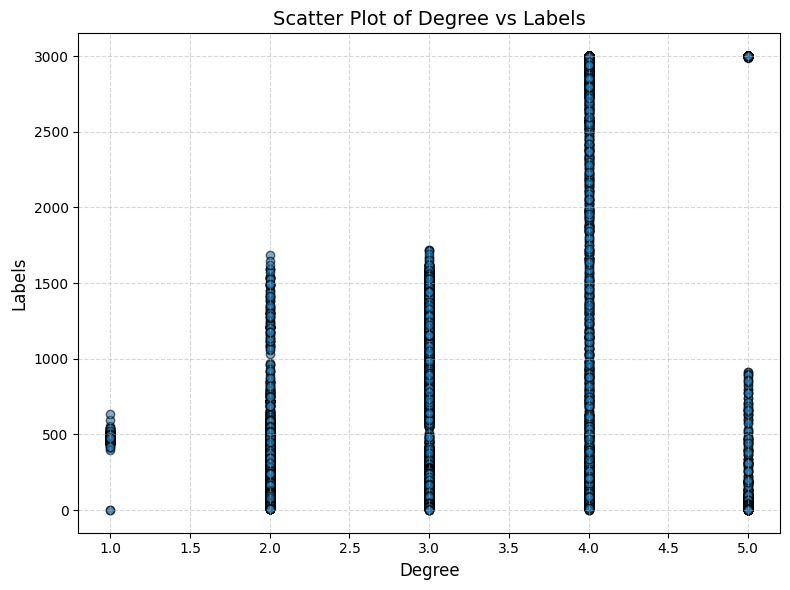

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'degree': df_degree_labels["degree"].tolist(),
    'labels': df_degree_labels["labels"].tolist(),
}
df = pd.DataFrame(data)

agg_dict = {}

for index, row in df_degree_labels.iterrows():
    if row["labels"] not in agg_dict:
        agg_dict[row["labels"]] = int(row["degree"])
    else:
        agg_dict[row["labels"]] += row["degree"]

print(agg_dict)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['labels'], df['degree'], alpha=0.6, edgecolor='k')

# Add labels and title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Labels", fontsize=12)
plt.title("Scatter Plot of Degree vs Labels", fontsize=14)

# Optional: grid and styling
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

       degree  labels
0         485       1
1         485       1
2         482       2
3         489       1
4         478       1
...       ...     ...
10272      10       5
10273       1       3
10274       2       5
10275       1       1
10276       1       1

[10277 rows x 2 columns]
   labels         mean  median
0       1   477.212766   479.0
1       2   306.317244   244.5
2       3   707.753778   658.0
3       4  1765.776761  2340.0
4       5  2369.105596  3000.0


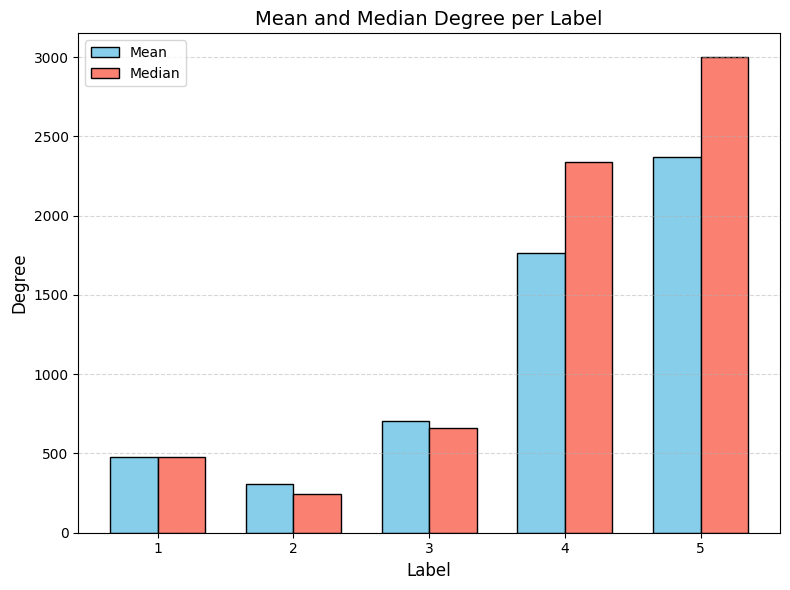

In [8]:
# Example: load data (adjust path as needed)
# df = pd.read_csv("data.csv", sep="\t")  # if tab-separated
# or if it's already in memory:
data = {
    'degree': df_degree_labels["degree"].tolist(),
    'labels': df_degree_labels["labels"].tolist(),
}
df = pd.DataFrame(data)

print(df)

grouped = df.groupby('labels')['degree'].agg(['mean', 'median']).reset_index()

print(grouped)

# --- Plot ---
plt.figure(figsize=(8, 6))

# Plot mean and median as grouped bars
width = 0.35
x = range(len(grouped))

plt.bar([i - width/2 for i in x], grouped['mean'], width=width, label='Mean', color='skyblue', edgecolor='k')
plt.bar([i + width/2 for i in x], grouped['median'], width=width, label='Median', color='salmon', edgecolor='k')

# --- Labels and styling ---
plt.xticks(x, grouped['labels'])
plt.xlabel('Label', fontsize=12)
plt.ylabel('Degree', fontsize=12)
plt.title('Mean and Median Degree per Label', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

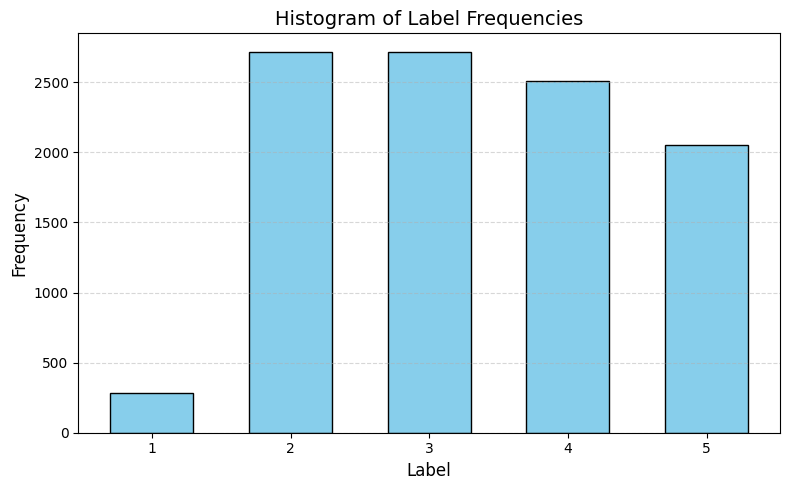

In [9]:
# Example: load data (adjust path as needed)
# df = pd.read_csv("data.csv", sep="\t")  # if tab-separated
# or if it's already in memory:
data = {
    'degree': df_degree_labels["degree"].tolist(),
    'labels': df_degree_labels["labels"].tolist(),
}
df = pd.DataFrame(data)

# --- Compute frequency of each label ---
label_counts = df['labels'].value_counts().sort_index()

# --- Plot histogram / bar plot ---
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black', width=0.6)

# --- Labels and formatting ---
plt.xlabel("Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Label Frequencies", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [15]:
p_out_links = "out_links_aml.csv"

df_out_links = pd.read_csv(base_path + p_out_links, sep=" ", header=None)

df_out_links = df_out_links.drop_duplicates()

df_out_links

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
6095977,2131,1830
6095978,1588,2650
6095979,1588,1830
6095980,5368,5404


In [21]:
path_signals = base_path + "combined_pos_neg_signals_aml.csv"
df_signals = pd.read_csv(path_signals, sep="\t")
print(df_signals.head())

   cg00394221_FCRL1  cg00755661_CTTNBP2NL  cg01343097_OR2M1P  \
0          0.884223              0.831418           0.867871   
1          0.866864              0.825809           0.785822   
2          0.854487              0.778697           0.857484   
3          0.893978              0.836100           0.886596   
4          0.877296              0.810414           0.873939   

   cg01523881_KIF21B  cg01637011_KIF21B  cg01717331_MED8  cg01833436_SDCCAG8  \
0           0.832828           0.396186         0.025495            0.872817   
1           0.696431           0.304295         0.031300            0.789504   
2           0.579665           0.105279         0.039160            0.789144   
3           0.112829           0.057675         0.022026            0.889303   
4           0.377757           0.059407         0.024142            0.840657   

   cg01833436_AKT3  cg01943585_CTTNBP2NL  cg01971755_KIF21B  ...  \
0         0.872817              0.897189           0.817078  ...  

In [32]:
df_seed_genes = pd.read_csv(base_path + "out_gene_rankings_aml.csv", sep=" ")
print(df_seed_genes.head())

df_seed_genes.columns = ["names", "associations", "labels"]

       cg00394221_FCRL1  0.825675  1
0  cg00755661_CTTNBP2NL  0.826098  1
1     cg01343097_OR2M1P  0.825862  1
2    cg01833436_SDCCAG8  0.824747  1
3       cg01833436_AKT3  0.824747  1
4  cg01943585_CTTNBP2NL  0.825006  1


In [35]:
df_seed_genes = df_seed_genes[df_seed_genes["labels"] == 1]
print(df_seed_genes.head())

seed_names = df_seed_genes["names"].tolist()

                  names  associations  labels
0  cg00755661_CTTNBP2NL      0.826098       1
1     cg01343097_OR2M1P      0.825862       1
2    cg01833436_SDCCAG8      0.824747       1
3       cg01833436_AKT3      0.824747       1
4  cg01943585_CTTNBP2NL      0.825006       1


In [36]:
seed_signals = df_signals[seed_names]
print(seed_signals)

    cg00755661_CTTNBP2NL  cg01343097_OR2M1P  cg01833436_SDCCAG8  \
0               0.831418           0.867871            0.872817   
1               0.825809           0.785822            0.789504   
2               0.778697           0.857484            0.789144   
3               0.836100           0.886596            0.889303   
4               0.810414           0.873939            0.840657   
5               0.807439           0.853442            0.844308   
6               0.819441           0.862376            0.828778   
7               0.839523           0.823514            0.841471   
8               0.825842           0.847107            0.849658   
9               0.863688           0.919482            0.833542   
10              0.823197           0.832386            0.749646   
11              0.844439           0.842623            0.833725   
12              0.817666           0.810016            0.834115   
13              0.839215           0.918853            0.82638

/tmp/ipykernel_2070196/1230763829.py:39: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(
/tmp/ipykernel_2070196/1230763829.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['CpG', 'Group'])['Value']
/tmp/ipykernel_2070196/1230763829.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ymax_per_cpg = df_melted.groupby('CpG')['Value'].max()
/tmp/ipykernel_2070196/1230763829.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

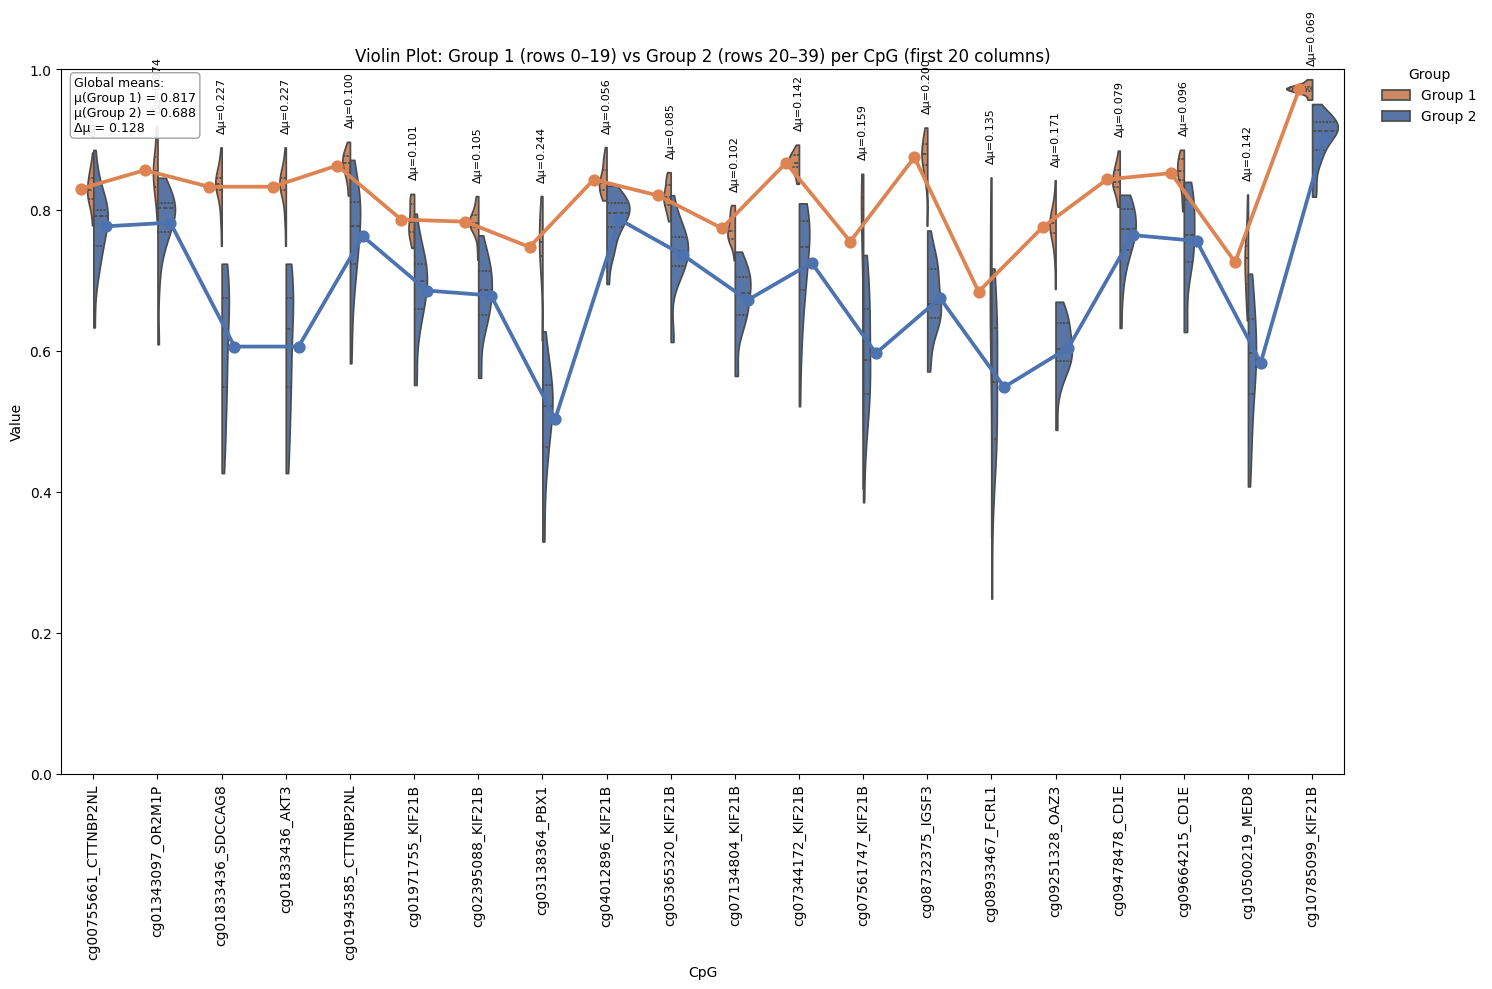

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data prep ---
df = seed_signals.copy()
topk_features = 20
df = df.iloc[:, :topk_features]                 # first 20 columns
group1 = df.iloc[:20].assign(Group='Group 1')   # first 20 rows
group2 = df.iloc[20:].assign(Group='Group 2')   # last 20 rows

df_melted = pd.concat([group1, group2], axis=0)
df_melted = df_melted.melt(id_vars='Group', var_name='CpG', value_name='Value')

# consistent order & palette (same style/colors as before)
hue_order = ['Group 1', 'Group 2']
group_colors = {'Group 1': '#dd8452', 'Group 2': '#4c72b0'}

# reorder categories explicitly
df_melted['Group'] = pd.Categorical(df_melted['Group'], categories=hue_order, ordered=True)
df_melted['CpG'] = pd.Categorical(df_melted['CpG'], categories=list(df.columns), ordered=True)

# --- Plot ---
plt.figure(figsize=(max(15, 0.5 * topk_features), 10))
ax = sns.violinplot(
    data=df_melted,
    x='CpG',
    y='Value',
    hue='Group',
    hue_order=hue_order,
    split=True,
    inner='quartile',
    cut=0,
    palette=group_colors
)

# overlay per-group means (and connect across CpGs)
sns.pointplot(
    data=df_melted,
    x='CpG',
    y='Value',
    hue='Group',
    hue_order=hue_order,
    dodge=0.4,
    join=True,
    markers='o',
    linestyles='-',
    errorbar=None,
    palette=group_colors,
    ax=ax
)

# remove duplicate legend from layering
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='Group', frameon=False, loc='upper left', bbox_to_anchor=(1.02, 1.02))

# compute group means per CpG
group_means = (
    df_melted
    .groupby(['CpG', 'Group'])['Value']
    .mean()
    .unstack('Group')  # columns: Group 1, Group 2
)

# annotate per-group means at the point markers
point_lines = [ln for ln in ax.lines if ln.get_marker() == 'o']
point_lines = point_lines[-len(hue_order):]  # keep the two lines we just added

for line, grp in zip(point_lines, hue_order):
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    for xi, yi in zip(xdata, ydata):
        ax.annotate(
            f'{yi:.3f}',
            (xi, yi),
            xytext=(0, 6),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=8,
            color=group_colors[grp],
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.6)
        )

# annotate per-feature Δμ = μ(G1) − μ(G2) above each CpG
ymax_per_cpg = df_melted.groupby('CpG')['Value'].max()
for i, cpg in enumerate(df.columns):
    if cpg not in group_means.index:
        continue
    mu_g1 = group_means.loc[cpg].get('Group 1', np.nan)
    mu_g2 = group_means.loc[cpg].get('Group 2', np.nan)
    if np.isnan(mu_g1) or np.isnan(mu_g2):
        continue
    dmu = mu_g1 - mu_g2
    ytxt = ymax_per_cpg.get(cpg, df_melted['Value'].max()) + 0.02
    ax.text(i, ytxt, f'Δμ={dmu:.3f}', ha='center', va='bottom', fontsize=8, rotation=90)

# --- Global mean per group (across all features) + their difference ---
global_means = df_melted.groupby('Group')['Value'].mean()
gmu_g1 = global_means.get('Group 1', np.nan)
gmu_g2 = global_means.get('Group 2', np.nan)
gdelta = gmu_g1 - gmu_g2

# add a small summary box inside the axes
summary_text = (
    f"Global means:\n"
    f"μ(Group 1) = {gmu_g1:.3f}\n"
    f"μ(Group 2) = {gmu_g2:.3f}\n"
    f"Δμ = {gdelta:.3f}"
)
ax.text(
    0.01, 0.99, summary_text,
    transform=ax.transAxes,
    ha='left', va='top',
    fontsize=9,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='0.6', alpha=0.9)
)

# cosmetics: y-scale, ticks, labels
ax.set_ylim(0, 1)  # <<< fix Y-axis scale to [0, 1]
plt.xticks(rotation=90, ha='center', fontsize=10)  # <<< rotate x labels by 90°
ax.set_xlabel('CpG')
ax.set_ylabel('Value')
ax.set_title('Violin Plot: Group 1 (rows 0–19) vs Group 2 (rows 20–39) per CpG (first 20 columns)')
plt.tight_layout()
plt.show()



In [4]:
df_test_probe_genes = pd.read_csv(base_path + "test_probe_genes.csv", sep=",")
df_test_probe_genes.head()

,test_gene_ids,test_gene_names
0,7073,cg06151744_P2RX5
1,7471,cg04258457_ERN1
2,11645,cg01949993_LAMC2
3,2342,cg02385474_PCNXL2
4,2684,cg03041808_EDARADD


In [5]:
probe_gene_list = df_test_probe_genes.iloc[:, 1].tolist()
len(probe_gene_list), probe_gene_list[:5]

(2704,
 ['cg06151744_P2RX5',
  'cg04258457_ERN1',
  'cg01949993_LAMC2',
  'cg02385474_PCNXL2',
  'cg03041808_EDARADD'])

In [6]:
df_nebit_features_test = df_nebit_features[df_nebit_features["name"].isin(probe_gene_list)]
df_nebit_features_test.reset_index(drop=True, inplace=True)
df_nebit_features_test

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,...,25,26,27,28,29,30,31,32,33,labels
0,cg00394221_FCRL1,1,4113,1,0.905257,2281.6360,0.352461,0.227665,0.884223,0.854487,...,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218,1
1,cg03138364_PBX1,1,4234,1,0.551498,3209.4320,2.213691,0.227113,0.794427,0.737284,...,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270,1
2,cg05365320_KIF21B,1,4324,1,0.906095,2283.7480,0.355691,0.227311,0.854060,0.784603,...,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851,1
3,cg07344172_KIF21B,1,4330,1,0.906136,2283.1860,0.355144,0.227333,0.883548,0.837806,...,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880,1
4,cg08732375_IGSF3,1,4092,1,0.596045,2970.6150,1.974394,0.227719,0.908273,0.856551,...,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,cg01778345_GDAP2,0,5,3,2.990594,158.0601,0.000015,0.000882,0.828892,0.433059,...,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380,5
2700,cg02642404_FAM36A,0,11,3,2.986049,157.9704,0.000049,0.002790,0.060620,0.073630,...,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288,5
2701,cg00581848_GPR157,0,5,3,2.987783,162.6307,0.000027,0.001714,0.109531,0.100585,...,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843,5
2702,cg05262634_CDCA8,0,2,3,2.987049,155.8967,0.000007,0.000422,0.114019,0.115849,...,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700,5


In [7]:
from sklearn.preprocessing import normalize, RobustScaler

def scale_features(list_feature_names, df_features):

    for feature_name in list_feature_names:
        print("Scaling: {}".format(feature_name))
        feature_val = np.array(df_features[feature_name].tolist())
        feature_val = feature_val.reshape(-1, 1)
        print(len(feature_val), feature_val.shape)
        transformer = RobustScaler().fit(feature_val)
        norm_feature_val = transformer.transform(feature_val)
        df_features[feature_name] = norm_feature_val
        
    return df_features

In [8]:
nebit_features = df_nebit_features_test.iloc[:, 2:-1]
nebit_features

,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,...,24,25,26,27,28,29,30,31,32,33
0,4113,1,0.905257,2281.6360,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,4234,1,0.551498,3209.4320,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,4324,1,0.906095,2283.7480,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,4330,1,0.906136,2283.1860,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,4092,1,0.596045,2970.6150,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,5,3,2.990594,158.0601,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,11,3,2.986049,157.9704,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,5,3,2.987783,162.6307,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,2,3,2.987049,155.8967,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [9]:
nebit_features_norm = scale_features(["degree", "ring", "NetShort"], nebit_features)
nebit_features_norm

Scaling: degree
2704 (2704, 1)
Scaling: ring
2704 (2704, 1)
Scaling: NetShort
2704 (2704, 1)


,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,...,24,25,26,27,28,29,30,31,32,33
0,0.735361,-1.0,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.769923,-1.0,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,0.795630,-1.0,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,0.797344,-1.0,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,0.729363,-1.0,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.438018,1.0,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,-0.436304,1.0,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,-0.438018,1.0,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,-0.438875,1.0,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [10]:
nebit_features_norm_umap = nebit_features_norm
nebit_features_norm_umap

,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,...,24,25,26,27,28,29,30,31,32,33
0,0.735361,-1.0,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.769923,-1.0,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,0.795630,-1.0,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,0.797344,-1.0,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,0.729363,-1.0,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.438018,1.0,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,-0.436304,1.0,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,-0.438018,1.0,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,-0.438875,1.0,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [11]:
feature_name = df_nebit_features_test.iloc[:, 0]
labels = df_nebit_features_test.iloc[:, -1]

df_labels = pd.DataFrame(zip(feature_name.tolist(), labels.tolist()), columns=["feature_name", "labels"])
df_labels

,feature_name,labels
0,cg00394221_FCRL1,1
1,cg03138364_PBX1,1
2,cg05365320_KIF21B,1
3,cg07344172_KIF21B,1
4,cg08732375_IGSF3,1
...,...,...
2699,cg01778345_GDAP2,5
2700,cg02642404_FAM36A,5
2701,cg00581848_GPR157,5
2702,cg05262634_CDCA8,5


In [12]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

n_neighbors=20 #10 #5
min_dist=0.999 #0.99 #0.99 #0.3
metric='correlation'

embeddings = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric='correlation').fit_transform(nebit_features_norm_umap)

/home/ubuntu/data/miniconda3/envs/nanodiag_biomarker/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-10 09:27:10.538740: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 09:27:10.581862: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 09:27:10.581893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 09:27:10.583759: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to regist

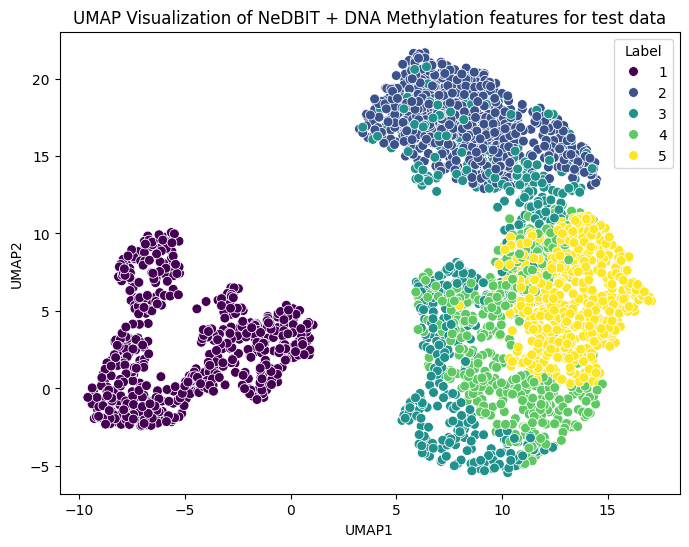

In [13]:
# Create a DataFrame with UMAP components and labels
data = {"UMAP1": embeddings[:, 0], "UMAP2": embeddings[:, 1], "Label": labels}
df_test = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df_test, palette="viridis", s=50, alpha=1.0)
#, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT + DNA Methylation features for test data")
plt.savefig(base_path + "umap_NeDBIT_DNAM_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [14]:
df_merged_signals = pd.read_csv("../../process_illumina_arrays/data/output/merged_signals.csv", sep="\t", engine="c")
df_merged_signals

,cg23954847_TFE3,cg00000957_NPHP4,cg00001349_MAEL,cg00001364_PROX1,cg00001446_ELOVL1,cg00001534_FAF1,cg00001583_NR5A2,cg00002028_PINK1,cg00002028_PINK1.1,cg00002593_TAS1R3,...,ch.22.533187F_HMOX1,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10
0,0.864672,0.919098,0.931214,0.825985,0.841873,0.905513,0.902962,0.052570,0.052570,0.831665,...,0.042048,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464
1,0.732438,0.884181,0.862162,0.758616,0.782469,0.853061,0.324640,0.091551,0.091551,0.797655,...,0.062322,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508
2,0.870964,0.896988,0.917439,0.798168,0.788342,0.883873,0.064378,0.041799,0.041799,0.831371,...,0.064128,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633
3,0.770894,0.896535,0.923548,0.781703,0.810133,0.898413,0.146580,0.061871,0.061871,0.788763,...,0.051624,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391
4,0.793325,0.900545,0.890331,0.753394,0.816442,0.874389,0.283989,0.044948,0.044948,0.789155,...,0.029399,0.112743,0.047210,0.025311,0.120706,0.158879,0.033180,0.039391,0.030883,0.108496
5,0.771238,0.881966,0.885884,0.706935,0.789394,0.844779,0.052274,0.058234,0.058234,0.768430,...,0.050518,0.144294,0.078152,0.046610,0.170648,0.172923,0.054839,0.068701,0.098243,0.220538
6,0.818622,0.858326,0.837925,0.785126,0.798059,0.887452,0.191977,0.062295,0.062295,0.477000,...,0.068426,0.181990,0.159486,0.043905,0.184506,0.147676,0.056958,0.065455,0.091866,0.168706
7,0.719042,0.888057,0.864124,0.758313,0.781905,0.884818,0.390451,0.088711,0.088711,0.825365,...,0.068621,0.154173,0.102731,0.059434,0.186476,0.138332,0.082228,0.073743,0.098911,0.185174
8,0.775340,0.892561,0.908382,0.771167,0.835124,0.877090,0.669288,0.088306,0.088306,0.788113,...,0.052823,0.139850,0.063330,0.047713,0.147007,0.168616,0.062604,0.070394,0.072000,0.148210
9,0.430085,0.882614,0.871273,0.797262,0.808716,0.878163,0.145391,0.072168,0.072168,0.823876,...,0.070245,0.171744,0.099462,0.066413,0.207633,0.188526,0.064079,0.077805,0.120990,0.165222


In [15]:
df_merged_signals["cg01550473_HSPA6"]

0     0.170122
1     0.234754
2     0.127171
3     0.241289
4     0.149802
5     0.237964
6     0.182503
7     0.269738
8     0.252819
9     0.291957
10    0.194857
11    0.167656
12    0.290617
13    0.211648
14    0.098939
15    0.146306
16    0.254082
17    0.150761
18    0.232884
19    0.134681
20    0.246714
21    0.139002
22    0.269388
23    0.136340
24    0.284338
25    0.264882
26    0.296536
27    0.172584
28    0.168938
29    0.227908
30    0.181529
31    0.093439
32    0.162609
33    0.263323
Name: cg01550473_HSPA6, dtype: float64

In [16]:
feature_names = df_labels["feature_name"].tolist()

In [17]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

,cg00394221_FCRL1,cg03138364_PBX1,cg05365320_KIF21B,cg07344172_KIF21B,cg08732375_IGSF3,cg10500219_MED8,cg10785099_KIF21B,cg12857074_KIF21B,cg17240157_PBX1,cg17876641_KIF21B,...,cg01873305_MRPS15,cg00649606_SLC19A2,cg00777895_SRP9,cg19772317_FANCM,cg03969070_STK40,cg01778345_GDAP2,cg02642404_FAM36A,cg00581848_GPR157,cg05262634_CDCA8,cg03524755_FAM73A
0,0.884223,0.794427,0.854060,0.883548,0.908273,0.811794,0.984450,0.798017,0.774234,0.822238,...,0.743802,0.338368,0.499055,0.082190,0.150310,0.828892,0.060620,0.109531,0.114019,0.652632
1,0.854487,0.737284,0.784603,0.837806,0.856551,0.714955,0.968724,0.685782,0.736658,0.749290,...,0.662043,0.327363,0.513337,0.072628,0.187409,0.433059,0.073630,0.100585,0.115849,0.673340
2,0.893978,0.786059,0.841955,0.893121,0.892464,0.659370,0.975738,0.780370,0.816740,0.814179,...,0.781706,0.327952,0.539838,0.052010,0.107705,0.071307,0.061032,0.112426,0.108110,0.664790
3,0.877296,0.751683,0.831785,0.878410,0.917480,0.711045,0.974421,0.738108,0.809655,0.775013,...,0.689753,0.343726,0.540066,0.082387,0.197413,0.469766,0.054784,0.164738,0.128333,0.619177
4,0.881579,0.739205,0.821238,0.874312,0.909598,0.757564,0.985892,0.697884,0.754403,0.734010,...,0.744069,0.328884,0.512826,0.049081,0.150834,0.447412,0.079514,0.102264,0.138480,0.630584
5,0.910560,0.738706,0.787695,0.869455,0.871968,0.670109,0.972633,0.718663,0.784075,0.770273,...,0.628410,0.335215,0.443950,0.060969,0.162949,0.670534,0.108485,0.109800,0.118957,0.638336
6,0.858944,0.777952,0.816858,0.879644,0.867753,0.733736,0.957147,0.727449,0.772563,0.787640,...,0.731505,0.335438,0.504610,0.035262,0.214853,0.788479,0.087466,0.089250,0.105784,0.705927
7,0.851166,0.758583,0.816591,0.886284,0.882735,0.784577,0.967040,0.698156,0.783202,0.741213,...,0.685484,0.334058,0.474879,0.049005,0.184074,0.089120,0.075425,0.098425,0.132962,0.622278
8,0.897877,0.706786,0.849428,0.865806,0.840987,0.729777,0.973070,0.735804,0.754818,0.797789,...,0.801460,0.333455,0.534614,0.045879,0.213423,0.514156,0.062101,0.116492,0.106625,0.676087
9,0.884387,0.785772,0.817566,0.850882,0.878348,0.689017,0.971051,0.772929,0.773562,0.788383,...,0.720843,0.328747,0.555848,0.061505,0.197292,0.209664,0.077052,0.135532,0.130550,0.668094


In [18]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
cg03138364_PBX1,0.794427,0.737284,0.786059,0.751683,0.739205,0.738706,0.777952,0.758583,0.706786,0.785772,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
cg05365320_KIF21B,0.854060,0.784603,0.841955,0.831785,0.821238,0.787695,0.816858,0.816591,0.849428,0.817566,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
cg07344172_KIF21B,0.883548,0.837806,0.893121,0.878410,0.874312,0.869455,0.879644,0.886284,0.865806,0.850882,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
cg08732375_IGSF3,0.908273,0.856551,0.892464,0.917480,0.909598,0.871968,0.867753,0.882735,0.840987,0.878348,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg01778345_GDAP2,0.828892,0.433059,0.071307,0.469766,0.447412,0.670534,0.788479,0.089120,0.514156,0.209664,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
cg02642404_FAM36A,0.060620,0.073630,0.061032,0.054784,0.079514,0.108485,0.087466,0.075425,0.062101,0.077052,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
cg00581848_GPR157,0.109531,0.100585,0.112426,0.164738,0.102264,0.109800,0.089250,0.098425,0.116492,0.135532,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
cg05262634_CDCA8,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,0.130550,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [19]:
dnam_signals_transpose.to_csv(base_path + "dnam_signals_transpose_test.csv")

In [20]:
dnam_signals_transpose = dnam_signals_transpose.reset_index()
dnam_signals_transpose

,index,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,cg03138364_PBX1,0.794427,0.737284,0.786059,0.751683,0.739205,0.738706,0.777952,0.758583,0.706786,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,cg05365320_KIF21B,0.854060,0.784603,0.841955,0.831785,0.821238,0.787695,0.816858,0.816591,0.849428,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,cg07344172_KIF21B,0.883548,0.837806,0.893121,0.878410,0.874312,0.869455,0.879644,0.886284,0.865806,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,cg08732375_IGSF3,0.908273,0.856551,0.892464,0.917480,0.909598,0.871968,0.867753,0.882735,0.840987,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,cg01778345_GDAP2,0.828892,0.433059,0.071307,0.469766,0.447412,0.670534,0.788479,0.089120,0.514156,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,cg02642404_FAM36A,0.060620,0.073630,0.061032,0.054784,0.079514,0.108485,0.087466,0.075425,0.062101,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,cg00581848_GPR157,0.109531,0.100585,0.112426,0.164738,0.102264,0.109800,0.089250,0.098425,0.116492,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,cg05262634_CDCA8,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [21]:
dnam_features = dnam_signals_transpose.iloc[:, 1:]
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.794427,0.737284,0.786059,0.751683,0.739205,0.738706,0.777952,0.758583,0.706786,0.785772,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,0.854060,0.784603,0.841955,0.831785,0.821238,0.787695,0.816858,0.816591,0.849428,0.817566,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,0.883548,0.837806,0.893121,0.878410,0.874312,0.869455,0.879644,0.886284,0.865806,0.850882,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,0.908273,0.856551,0.892464,0.917480,0.909598,0.871968,0.867753,0.882735,0.840987,0.878348,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.828892,0.433059,0.071307,0.469766,0.447412,0.670534,0.788479,0.089120,0.514156,0.209664,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,0.060620,0.073630,0.061032,0.054784,0.079514,0.108485,0.087466,0.075425,0.062101,0.077052,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,0.109531,0.100585,0.112426,0.164738,0.102264,0.109800,0.089250,0.098425,0.116492,0.135532,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,0.130550,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [22]:
n_neighbors=35 #10 #10 #5
min_dist=0.999 #0.99 #0.99 #0.3
metric='correlation'

dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(dnam_features)

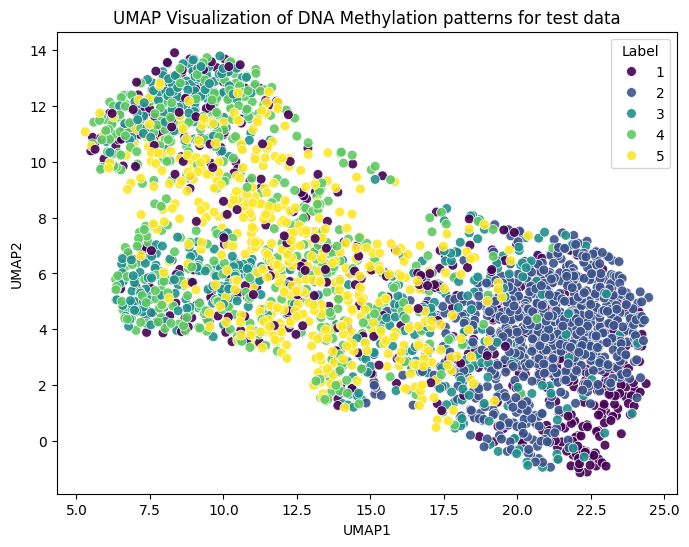

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": dnam_embeddings[:, 0], "UMAP2": dnam_embeddings[:, 1], "Label": labels}
df_dnam = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df_dnam, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of DNA Methylation patterns for test data")
plt.savefig(base_path + "umap_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [24]:
#nebit_features = nebit_features.reset_index()
nebit_features

,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,...,24,25,26,27,28,29,30,31,32,33
0,0.735361,-1.0,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.769923,-1.0,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,0.795630,-1.0,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,0.797344,-1.0,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,0.729363,-1.0,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.438018,1.0,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,-0.436304,1.0,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,-0.438018,1.0,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,-0.438875,1.0,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [25]:
#dnam_features

In [26]:
#nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features = nebit_features #pd.concat([nebit_features, dnam_features], axis=1)
nebit_dnam_features

,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,...,24,25,26,27,28,29,30,31,32,33
0,0.735361,-1.0,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.769923,-1.0,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,0.795630,-1.0,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,0.797344,-1.0,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,0.729363,-1.0,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.438018,1.0,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,-0.436304,1.0,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,-0.438018,1.0,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,-0.438875,1.0,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [27]:
n_neighbors=20 #20 #10 #5
min_dist=0.999 #0.8 #0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features)

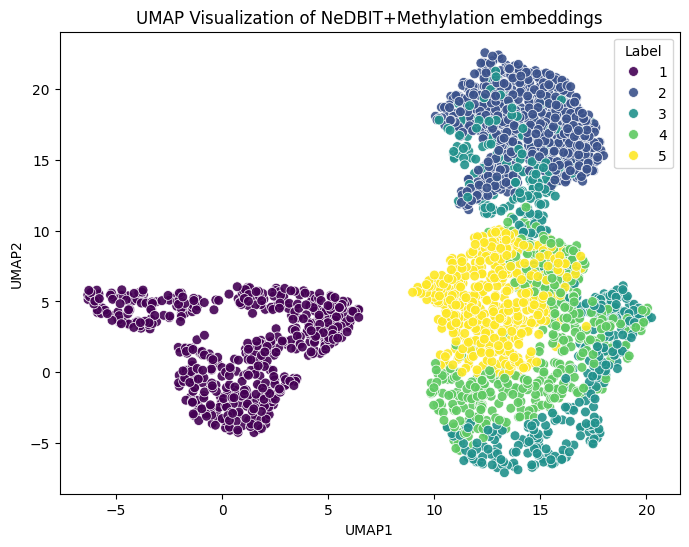

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a data frame with UMAP components and labels
data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT+Methylation embeddings")
plt.savefig(base_path + "umap_NeDBIT_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [29]:
df_nebit_dnam_features = nebit_dnam_features

In [30]:
df_nebit_dnam_features["labels"] = labels
df_nebit_dnam_features["feature_names"] = df_labels["feature_name"].tolist()

In [31]:
file_path = base_path + "df_nebit_dnam_features_test.csv"
df_nebit_dnam_features.to_csv(file_path, sep="\t", header=None, index=None)
df_nebit_dnam_features

,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,...,26,27,28,29,30,31,32,33,labels,feature_names
0,0.735361,-1.0,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,...,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218,1,cg00394221_FCRL1
1,0.769923,-1.0,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,...,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270,1,cg03138364_PBX1
2,0.795630,-1.0,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,...,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851,1,cg05365320_KIF21B
3,0.797344,-1.0,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,...,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880,1,cg07344172_KIF21B
4,0.729363,-1.0,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,...,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292,1,cg08732375_IGSF3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.438018,1.0,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,...,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380,5,cg01778345_GDAP2
2700,-0.436304,1.0,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,...,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288,5,cg02642404_FAM36A
2701,-0.438018,1.0,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,...,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843,5,cg00581848_GPR157
2702,-0.438875,1.0,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,...,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700,5,cg05262634_CDCA8


In [64]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import umap

base_path = "../data/output/"
base_plot_path = "../data/output/"
embed_conv = torch.load(base_path + "embed_conv.pt")
embed_batch_norm = torch.load(base_path + "embed_batch_norm.pt")
true_labels = torch.load(base_path + "true_labels.pt")
pred_labels = torch.load(base_path + "pred_labels.pt")
true_labels = [int(item) + 1 for item in true_labels]
pred_labels = [int(item) + 1 for item in pred_labels]

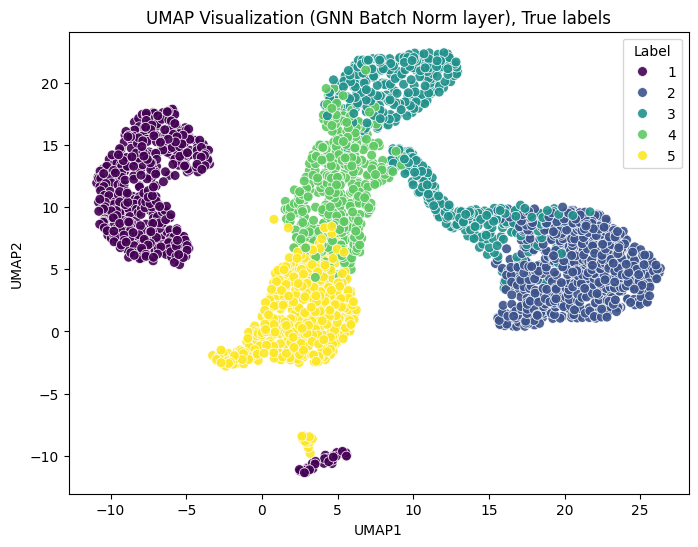

In [65]:
n_neighbors=35 #10 #5
min_dist=0.999 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_batch_norm)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization (GNN Batch Norm layer), True labels")
plt.savefig(base_plot_path + "umap_batch_norm_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

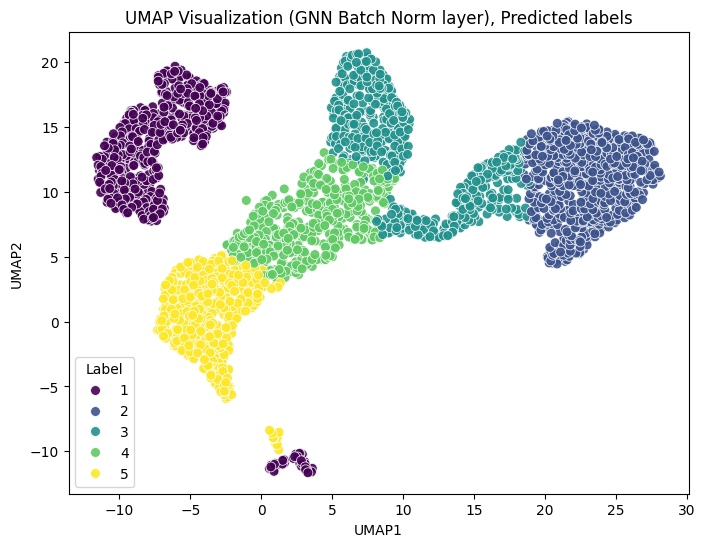

In [66]:
n_neighbors=35 #10 #5
min_dist=0.999 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_batch_norm)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": pred_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization (GNN Batch Norm layer), Predicted labels")
plt.savefig(base_plot_path + "umap_batch_norm_{}_{}_{}.pdf".format(n_neighbors, min_dist, "pred_labels"))
plt.show()

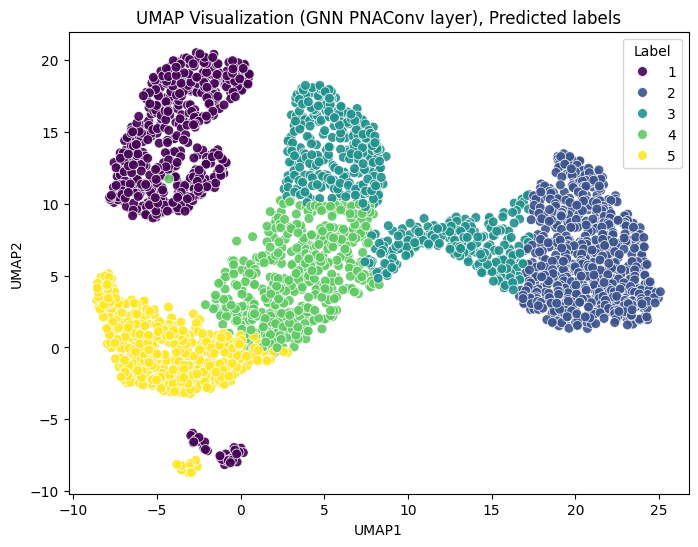

In [69]:
n_neighbors=35 #10 #5
min_dist=0.999 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_conv)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": pred_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization (GNN PNAConv layer), Predicted labels")
plt.savefig(base_plot_path + "umap_conv_{}_{}_{}.pdf".format(n_neighbors, min_dist, "pred_labels"))
plt.show()

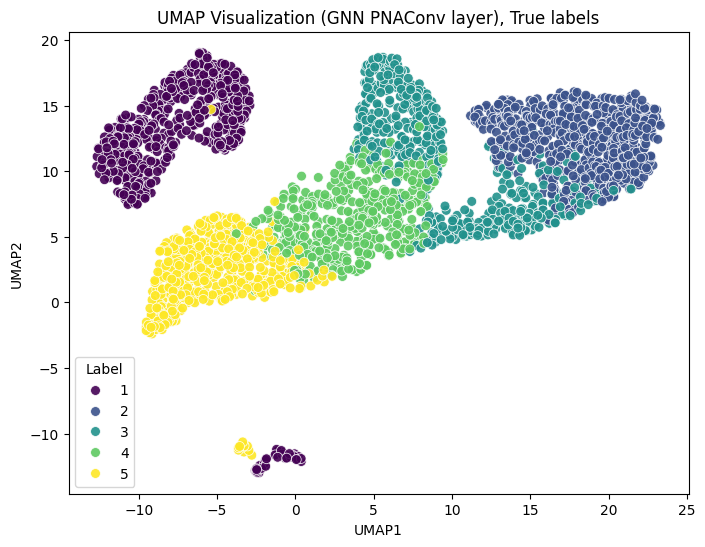

In [68]:
n_neighbors=35 #5
min_dist=0.999 #0.3
metric='correlation'

umap_conv_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_conv)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_conv_embed[:, 0], "UMAP2": umap_conv_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization (GNN PNAConv layer), True labels")
plt.savefig(base_plot_path + "umap_conv_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [37]:
import pandas as pd
import numpy as np

file_path = base_path + "df_nebit_dnam_features_test.csv"
df_test_data = pd.read_csv(file_path, sep="\t", header=None)
df_test_data

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.735361,-1.0,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,...,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218,1,cg00394221_FCRL1
1,0.769923,-1.0,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,...,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270,1,cg03138364_PBX1
2,0.795630,-1.0,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,...,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851,1,cg05365320_KIF21B
3,0.797344,-1.0,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,...,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880,1,cg07344172_KIF21B
4,0.729363,-1.0,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,...,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292,1,cg08732375_IGSF3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.438018,1.0,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,...,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380,5,cg01778345_GDAP2
2700,-0.436304,1.0,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,...,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288,5,cg02642404_FAM36A
2701,-0.438018,1.0,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,...,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843,5,cg00581848_GPR157
2702,-0.438875,1.0,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,...,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700,5,cg05262634_CDCA8


In [38]:
#df_labels = df_test_data.loc[:, 40:]
df_labels["pred_labels"] = pred_labels
#df_labels.columns = ["labels", "features", "pred_labels"]
df_labels

,feature_name,labels,pred_labels
0,cg00394221_FCRL1,1,1
1,cg03138364_PBX1,1,1
2,cg05365320_KIF21B,1,1
3,cg07344172_KIF21B,1,1
4,cg08732375_IGSF3,1,1
...,...,...,...
2699,cg01778345_GDAP2,5,5
2700,cg02642404_FAM36A,5,5
2701,cg00581848_GPR157,5,5
2702,cg05262634_CDCA8,5,5


In [39]:
df_seeds = pd.read_csv("../../pu_label_propagation/data/input/seed_features.tsv", sep="\t", header=None)
df_seeds.columns = ["features", "association_scores"]
df_seeds

,features,association_scores
0,cg00394221_FCRL1,0.035990
1,cg00755661_CTTNBP2NL,0.043460
2,cg01343097_OR2M1P,0.186200
3,cg01523881_KIF21B,0.036170
4,cg01637011_KIF21B,0.036170
...,...,...
1753,cg00627846_FAM19A5,0.180439
1754,cg08550094_CECR5,0.264307
1755,cg19790884_C22orf34,0.261563
1756,cg23531285_POTEH,0.305018


In [40]:
pred_likely_pos = df_labels[(df_labels["labels"].isin([2, 3, 4, 5])) & \
                                    (df_labels["pred_labels"].isin([2]))]
pred_likely_pos

,feature_name,labels,pred_labels
284,cg00000957_NPHP4,2,2
286,cg00001534_FAF1,2,2
287,cg00003513_CASZ1,2,2
288,cg00006397_NHLH1,2,2
289,cg00006626_NUP210L,2,2
...,...,...,...
1124,cg05784088_FCRL2,2,2
1125,cg05785811_CAMTA1,2,2
1145,cg01949002_SKI,3,2
1146,cg02050917_SKI,2,2


In [41]:
pred_pos = df_labels[(df_labels["labels"].isin([1])) & \
                                    (df_labels["pred_labels"].isin([1]))]
pred_pos

,feature_name,labels,pred_labels
0,cg00394221_FCRL1,1,1
1,cg03138364_PBX1,1,1
2,cg05365320_KIF21B,1,1
3,cg07344172_KIF21B,1,1
4,cg08732375_IGSF3,1,1
...,...,...,...
2660,cg21594961_IL5RA,1,1
2670,cg09772954_GALNTL6,1,1
2676,cg03828494_ERN1,1,1
2686,cg23193730_ZNF140,1,1


In [42]:
df_out_genes = pd.read_csv("../../pu_label_propagation/data/output/out_genes.csv", sep=" ", header=None)
df_out_genes

,0,1,2
0,0,cg00394221_FCRL1,0.035990
1,1,cg00755661_CTTNBP2NL,0.043460
2,2,cg01343097_OR2M1P,0.186200
3,3,cg01833436_SDCCAG8,0.229621
4,4,cg01833436_AKT3,0.229621
...,...,...,...
11751,11751,cg01909024_PAQR7,0.000000
11752,11752,cg02073054_IL19,0.000000
11753,11753,cg02073054_IL19.1,0.000000
11754,11754,cg05262634_CDCA8,0.000000


In [43]:
test_probe_id_list = list()
for i, row in pred_likely_pos.iterrows():
    r_values = row.values
    name = r_values[0]
    id = df_out_genes[df_out_genes.iloc[:, 1] == name]
    test_probe_id_list.append(id.values[0][0])

In [44]:
pred_likely_pos["test_probe_ids"] = test_probe_id_list
pred_likely_pos.to_csv("../data/output/pred_likely_pos.csv", sep=",", index=None)
pred_likely_pos

/tmp/ipykernel_122371/3699269191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_likely_pos["test_probe_ids"] = test_probe_id_list


,feature_name,labels,pred_labels,test_probe_ids
284,cg00000957_NPHP4,2,2,898
286,cg00001534_FAF1,2,2,902
287,cg00003513_CASZ1,2,2,906
288,cg00006397_NHLH1,2,2,908
289,cg00006626_NUP210L,2,2,909
...,...,...,...,...
1124,cg05784088_FCRL2,2,2,4112
1125,cg05785811_CAMTA1,2,2,4113
1145,cg01949002_SKI,3,2,4202
1146,cg02050917_SKI,2,2,4205


In [45]:
likely_pos_pred_likely_pos = df_labels[(df_labels["labels"].isin([2])) | \
                                    (df_labels["pred_labels"].isin([2]))]
likely_pos_pred_likely_pos

,feature_name,labels,pred_labels
284,cg00000957_NPHP4,2,2
286,cg00001534_FAF1,2,2
287,cg00003513_CASZ1,2,2
288,cg00006397_NHLH1,2,2
289,cg00006626_NUP210L,2,2
...,...,...,...
1124,cg05784088_FCRL2,2,2
1125,cg05785811_CAMTA1,2,2
1145,cg01949002_SKI,3,2
1146,cg02050917_SKI,2,2


In [46]:
training_node_ids = pd.read_csv("../data/output/training_node_ids.csv", sep="\t")
training_node_ids

,training_node_ids
0,8720
1,7195
2,6715
3,1586
4,5218
...,...
7871,11284
7872,5191
7873,5390
7874,860


In [47]:
all_tr_genes = []
all_tr_probes = []
tr_probes_genes = []

tr_probes_genes = df_out_genes[df_out_genes.iloc[:, 0].isin(training_node_ids["training_node_ids"].tolist())]
tr_probes_genes

,0,1,2
1,1,cg00755661_CTTNBP2NL,0.043460
2,2,cg01343097_OR2M1P,0.186200
4,4,cg01833436_AKT3,0.229621
5,5,cg01943585_CTTNBP2NL,0.043460
6,6,cg01971755_KIF21B,0.036170
...,...,...,...
11747,11747,cg01061626_KIAA2013.1,0.000000
11749,11749,cg01804284_NFYC.1,0.000000
11751,11751,cg01909024_PAQR7,0.000000
11752,11752,cg02073054_IL19,0.000000


In [48]:
tr_genes = list()
tr_probes = list()
for i, row in tr_probes_genes.iterrows():
    rvals = row.values[1].split("_")
    tr_probes.append(rvals[0])
    tr_genes.append(rvals[1])

tr_probes_genes["genes"] = tr_genes
tr_probes_genes["probes"] = tr_probes
tr_probes_genes.to_csv("../data/output/tr_probes_genes.csv", sep="\t", index=None)
tr_probes_genes

/tmp/ipykernel_122371/1257697857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_probes_genes["genes"] = tr_genes
/tmp/ipykernel_122371/1257697857.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_probes_genes["probes"] = tr_probes


,0,1,2,genes,probes
1,1,cg00755661_CTTNBP2NL,0.043460,CTTNBP2NL,cg00755661
2,2,cg01343097_OR2M1P,0.186200,OR2M1P,cg01343097
4,4,cg01833436_AKT3,0.229621,AKT3,cg01833436
5,5,cg01943585_CTTNBP2NL,0.043460,CTTNBP2NL,cg01943585
6,6,cg01971755_KIF21B,0.036170,KIF21B,cg01971755
...,...,...,...,...,...
11747,11747,cg01061626_KIAA2013.1,0.000000,KIAA2013.1,cg01061626
11749,11749,cg01804284_NFYC.1,0.000000,NFYC.1,cg01804284
11751,11751,cg01909024_PAQR7,0.000000,PAQR7,cg01909024
11752,11752,cg02073054_IL19,0.000000,IL19,cg02073054


In [49]:
tr_genes = list()
tr_probes = list()
for i, row in tr_probes_genes.iterrows():
    rvals = row.values[1].split("_")
    tr_probes.append(rvals[0])
    tr_genes.append(rvals[1])

tr_probes_genes["genes"] = tr_genes
tr_probes_genes["probes"] = tr_probes
tr_probes_genes.to_csv("../data/output/tr_probes_genes.csv", sep="\t", index=None)
tr_probes_genes

/tmp/ipykernel_122371/1257697857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_probes_genes["genes"] = tr_genes
/tmp/ipykernel_122371/1257697857.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_probes_genes["probes"] = tr_probes


,0,1,2,genes,probes
1,1,cg00755661_CTTNBP2NL,0.043460,CTTNBP2NL,cg00755661
2,2,cg01343097_OR2M1P,0.186200,OR2M1P,cg01343097
4,4,cg01833436_AKT3,0.229621,AKT3,cg01833436
5,5,cg01943585_CTTNBP2NL,0.043460,CTTNBP2NL,cg01943585
6,6,cg01971755_KIF21B,0.036170,KIF21B,cg01971755
...,...,...,...,...,...
11747,11747,cg01061626_KIAA2013.1,0.000000,KIAA2013.1,cg01061626
11749,11749,cg01804284_NFYC.1,0.000000,NFYC.1,cg01804284
11751,11751,cg01909024_PAQR7,0.000000,PAQR7,cg01909024
11752,11752,cg02073054_IL19,0.000000,IL19,cg02073054


In [50]:
pred_likely_pos = df_labels[(df_labels["labels"].isin([2, 3, 4, 5])) & \
                                    (df_labels["pred_labels"].isin([2]))]
pred_likely_pos

,feature_name,labels,pred_labels
284,cg00000957_NPHP4,2,2
286,cg00001534_FAF1,2,2
287,cg00003513_CASZ1,2,2
288,cg00006397_NHLH1,2,2
289,cg00006626_NUP210L,2,2
...,...,...,...
1124,cg05784088_FCRL2,2,2
1125,cg05785811_CAMTA1,2,2
1145,cg01949002_SKI,3,2
1146,cg02050917_SKI,2,2


In [51]:
tr_genes = list()
tr_probes = list()
for i, row in pred_likely_pos.iterrows():
    rvals = row.values[0].split("_")
    tr_probes.append(rvals[0])
    tr_genes.append(rvals[1])

pred_likely_pos["genes"] = tr_genes
pred_likely_pos["probes"] = tr_probes
pred_likely_pos

/tmp/ipykernel_122371/826592383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_likely_pos["genes"] = tr_genes
/tmp/ipykernel_122371/826592383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_likely_pos["probes"] = tr_probes


,feature_name,labels,pred_labels,genes,probes
284,cg00000957_NPHP4,2,2,NPHP4,cg00000957
286,cg00001534_FAF1,2,2,FAF1,cg00001534
287,cg00003513_CASZ1,2,2,CASZ1,cg00003513
288,cg00006397_NHLH1,2,2,NHLH1,cg00006397
289,cg00006626_NUP210L,2,2,NUP210L,cg00006626
...,...,...,...,...,...
1124,cg05784088_FCRL2,2,2,FCRL2,cg05784088
1125,cg05785811_CAMTA1,2,2,CAMTA1,cg05785811
1145,cg01949002_SKI,3,2,SKI,cg01949002
1146,cg02050917_SKI,2,2,SKI,cg02050917


In [52]:
pred_likely_pos = pred_likely_pos[~pred_likely_pos["genes"].isin(tr_probes_genes["genes"])]
pred_likely_pos = pred_likely_pos[~pred_likely_pos["probes"].isin(tr_probes_genes["probes"])]
pred_likely_pos 

,feature_name,labels,pred_labels,genes,probes
313,cg00109164_GPA33,2,2,GPA33,cg00109164
341,cg00233485_HPDL,2,2,HPDL,cg00233485
377,cg00421368_GJA5,2,2,GJA5,cg00421368
404,cg00619207_DENND2D,2,2,DENND2D,cg00619207
421,cg00715811_OR2W5,2,2,OR2W5,cg00715811
441,cg00810939_IL22RA1,2,2,IL22RA1,cg00810939
465,cg00920395_OR6K3,2,2,OR6K3,cg00920395
466,cg00924622_CROCCL2,2,2,CROCCL2,cg00924622
475,cg00953211_HFE2,2,2,HFE2,cg00953211
517,cg01143426_MPL,2,2,MPL,cg01143426


In [53]:
pred_likely_pos_ids = list()

for i, row in pred_likely_pos.iterrows():
    f_name = row["feature_name"]
    probe_gene_id = df_out_genes[df_out_genes.iloc[:, 1] == f_name]
    pred_likely_pos_ids.append(probe_gene_id.values[0][0])

pred_likely_pos["probe_gene_ids"] = pred_likely_pos_ids
pred_likely_pos

,feature_name,labels,pred_labels,genes,probes,probe_gene_ids
313,cg00109164_GPA33,2,2,GPA33,cg00109164,1022
341,cg00233485_HPDL,2,2,HPDL,cg00233485,1111
377,cg00421368_GJA5,2,2,GJA5,cg00421368,1247
404,cg00619207_DENND2D,2,2,DENND2D,cg00619207,1368
421,cg00715811_OR2W5,2,2,OR2W5,cg00715811,1421
441,cg00810939_IL22RA1,2,2,IL22RA1,cg00810939,1494
465,cg00920395_OR6K3,2,2,OR6K3,cg00920395,1584
466,cg00924622_CROCCL2,2,2,CROCCL2,cg00924622,1592
475,cg00953211_HFE2,2,2,HFE2,cg00953211,1616
517,cg01143426_MPL,2,2,MPL,cg01143426,1758


In [59]:
pred_likely_pos.to_csv("../data/output/pred_likely_pos_no_training_genes_probes.csv", index=None, sep="\t")

In [60]:
all_pred_likely_pos = df_labels[(df_labels["labels"].isin([2, 3, 4, 5])) & \
                                    (df_labels["pred_labels"].isin([2]))]
all_pred_likely_pos

,feature_name,labels,pred_labels
284,cg00000957_NPHP4,2,2
286,cg00001534_FAF1,2,2
287,cg00003513_CASZ1,2,2
288,cg00006397_NHLH1,2,2
289,cg00006626_NUP210L,2,2
...,...,...,...
1124,cg05784088_FCRL2,2,2
1125,cg05785811_CAMTA1,2,2
1145,cg01949002_SKI,3,2
1146,cg02050917_SKI,2,2


In [61]:
tr_genes = list()
tr_probes = list()
for i, row in all_pred_likely_pos.iterrows():
    rvals = row.values[0].split("_")
    tr_probes.append(rvals[0])
    tr_genes.append(rvals[1])

all_pred_likely_pos["genes"] = tr_genes
all_pred_likely_pos["probes"] = tr_probes
all_pred_likely_pos

/tmp/ipykernel_122371/2470503085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pred_likely_pos["genes"] = tr_genes
/tmp/ipykernel_122371/2470503085.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pred_likely_pos["probes"] = tr_probes


,feature_name,labels,pred_labels,genes,probes
284,cg00000957_NPHP4,2,2,NPHP4,cg00000957
286,cg00001534_FAF1,2,2,FAF1,cg00001534
287,cg00003513_CASZ1,2,2,CASZ1,cg00003513
288,cg00006397_NHLH1,2,2,NHLH1,cg00006397
289,cg00006626_NUP210L,2,2,NUP210L,cg00006626
...,...,...,...,...,...
1124,cg05784088_FCRL2,2,2,FCRL2,cg05784088
1125,cg05785811_CAMTA1,2,2,CAMTA1,cg05785811
1145,cg01949002_SKI,3,2,SKI,cg01949002
1146,cg02050917_SKI,2,2,SKI,cg02050917


In [62]:
pos_ids = list()

for i, row in all_pred_likely_pos.iterrows():
    f_name = row["feature_name"]
    probe_gene_id = df_out_genes[df_out_genes.iloc[:, 1] == f_name]
    pos_ids.append(probe_gene_id.values[0][0])

all_pred_likely_pos["probe_gene_ids"] = pos_ids
all_pred_likely_pos

/tmp/ipykernel_122371/2197220117.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pred_likely_pos["probe_gene_ids"] = pos_ids


,feature_name,labels,pred_labels,genes,probes,probe_gene_ids
284,cg00000957_NPHP4,2,2,NPHP4,cg00000957,898
286,cg00001534_FAF1,2,2,FAF1,cg00001534,902
287,cg00003513_CASZ1,2,2,CASZ1,cg00003513,906
288,cg00006397_NHLH1,2,2,NHLH1,cg00006397,908
289,cg00006626_NUP210L,2,2,NUP210L,cg00006626,909
...,...,...,...,...,...,...
1124,cg05784088_FCRL2,2,2,FCRL2,cg05784088,4112
1125,cg05785811_CAMTA1,2,2,CAMTA1,cg05785811,4113
1145,cg01949002_SKI,3,2,SKI,cg01949002,4202
1146,cg02050917_SKI,2,2,SKI,cg02050917,4205


In [63]:
all_pred_likely_pos.to_csv("../data/output/all_pred_likely_pos.csv", index=None, sep="\t")

In [57]:
# cg00003513_CASZ1
# https://haematologica.org/article/view/7138/43082

# ----------------------------------------- Probes and Genes only in test data ----------------------------

# GPA33
# https://einsteinmed.edu/uploadedFiles/departments/CellBiology/Faculty/Ye/Shah2018.pdf
# https://pure.rug.nl/ws/portalfiles/portal/81367516/Chapter_3.pdf

# cg00233485_HPDL
# https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2023.1120670/full

# cg05384663_FCRL3
# https://gredos.usal.es/bitstream/handle/10366/140429/DME_HernandezSanchezJM%AA_TherapyInducedChangesHematologicalDiseases.pdf;jsessionid=3363ECB6F75FEFDE7B2BB30FADCB2AE0?sequence=1

# cg01732037_TBX19
# https://www.nature.com/articles/s41375-022-01789-6
# https://pure.rug.nl/ws/portalfiles/portal/98637969/Complete_thesis.pdf

# CDC42
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8125016/
#

# cg02103935_GBP2
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4794368/
# https://aacrjournals.org/cancerres/article/73/2/885/588745/Hypomethylating-Therapy-in-an-Aggressive-Stroma

# cg01942646_NR0B2
# https://link.springer.com/content/pdf/10.1007/978-1-4614-1683-8.pdf
# https://cdn.intechopen.com/pdfs/32812/InTech-Dna_methylation_in_acute_leukemia.pdf

# cg01971224_CELSR2
# https://haematologica.org/article/view/7138/43082


In [58]:
pos_likely_pos_features = pred_likely_pos["features"].tolist()
print(len(pos_likely_pos_features))
df_seeds_as_positive = df_seeds[df_seeds["features"].isin(pos_likely_pos_features)]
df_seeds_as_positive

KeyError: 'features'

In [ ]:
np.median(df_seeds_as_positive["association_scores"])

In [ ]:
negative_likely_negative = df_f_name_labels[df_f_name_labels["labels"].isin([3,4,5])]
negative_likely_negative

In [ ]:
negative_likely_negative_features = negative_likely_negative["features"].tolist()
df_seeds_as_negative = df_seeds[df_seeds["features"].isin(negative_likely_negative_features)]
df_seeds_as_negative

In [ ]:
# likely positive
df_likely_positive = df_f_name_labels[df_f_name_labels["pred_labels"].isin([1]) & \
                                      df_f_name_labels["labels"].isin([5])]
df_likely_positive, len(df_likely_positive)

In [ ]:
df_likely_positive_features = df_likely_positive["features"].tolist()
len(df_likely_positive_features), df_likely_positive_features[:5]

In [ ]:
df_seed_features = df_seeds["features"].tolist()
len(df_seed_features), df_seed_features[:5]

In [ ]:
likely_pos_in_seeds = list(set(df_seed_features).intersection(set(df_likely_positive_features)))
len(likely_pos_in_seeds), likely_pos_in_seeds[:5]